Activate `npx_10m_384ch_unit_classes` venv

In [2]:
import spikeinterface.extractors as se 
Recording = se.read_mcsraw('/gpfs/bbp.cscs.ch/project/proj68/scratch/imbeni/sorting/dataset/reyes/Exp09/S001E009F002_Raw.raw') 

### Select good channels and spontaneous activity

In [3]:
import numpy as np
GOOD_CHANNELS = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
SPONTANEOUS_PERIOD = [1000, 4300]
SAMPFREQ = 20000

# load RecordingExtractor
# Recording = si.load_extractor(data_conf["recording"]["output"])
traces = Recording.get_traces()
traces = traces[:, GOOD_CHANNELS]

gain_to_uV = Recording.get_property('gain_to_uV')
offset_to_uV = Recording.get_property('offset_to_uV')
channel_name = Recording.get_property('channel_name')
channel_ids = Recording.get_channel_ids()

# select properties for good channels
channel_ids = np.array([str(ci) for ci in GOOD_CHANNELS])
gain_to_uV = gain_to_uV[GOOD_CHANNELS]
offset_to_uV = offset_to_uV[GOOD_CHANNELS]
channel_name = channel_name[GOOD_CHANNELS]

# get sample times, locate spontaneous timepoints
times = Recording.get_times()
spontaneous_loc = (times >= SPONTANEOUS_PERIOD[0]) & (times < SPONTANEOUS_PERIOD[1])
traces = traces[spontaneous_loc,:]

# create spontaneous recording
Recording = se.NumpyRecording([traces], sampling_frequency=SAMPFREQ, channel_ids=channel_ids)

# reset times
new_times = np.arange(0, SPONTANEOUS_PERIOD[1] - SPONTANEOUS_PERIOD[0], 1/SAMPFREQ)
Recording.set_times(new_times)

Recording.set_property('gain_to_uV', values=gain_to_uV) 
Recording.set_property('offset_to_uV', values=offset_to_uV)
Recording.set_property('channel_name', values=channel_name)

/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/spikeinterface/core/baserecording.py:194: UserWarning: Setting times with Recording.set_times() is not recommended because times are not always propagated to across preprocessingUse use this carefully!
  warn('Setting times with Recording.set_times() is not recommended because '


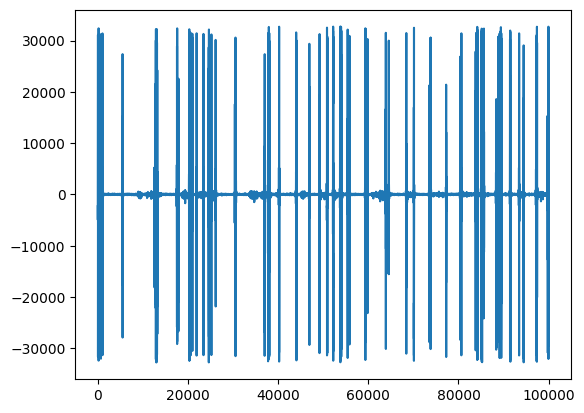

In [4]:
from matplotlib import pyplot as plt
import spikeinterface.preprocessing as spre

# preprocessing
Recording_pre = spre.bandpass_filter(Recording, freq_min=300, freq_max=3000)
traces_pre = Recording_pre.get_traces()

plt.plot(traces_pre[:100000,15])

In [5]:
traces_pre.dtype

dtype('int16')